# **COVID 19 and its effect on Amazon Employees**
The COVID-19 Pandemic changed life as we knew it. On March 11th, 2020, The World Health Organization (WHO) declared COVID-19 a pandemic, but the spread of COVID-19 goes back to January 10, 2020, when WHO announces that the outbreak in Wuhan, China is caused by the 2019 Novel Coronavirus (2019-nCoV). 

Currently, there are 623 million people in the world who experienced COVID-19, including 6.56 million people who have died from the virus.


In this notebook, we will visualize how Amazon's coworker have been affected by the covid-19. 

Data have been downloaded from Kaggle: [DataScience and STEM Salaries](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries .
)

I will go through the very first step : data cleansing to data visualization.
I will mainly use pandas, matplotib, seaborn and plotly.

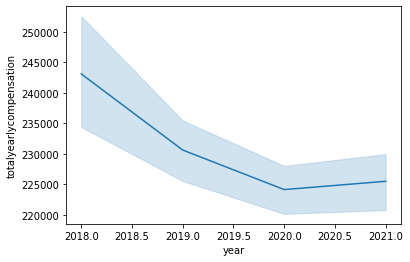

In [ ]:
sns.lineplot(data=df4, x="year", y="totalyearlycompensation")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

**I- DATA CLEANSING**

In [ ]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


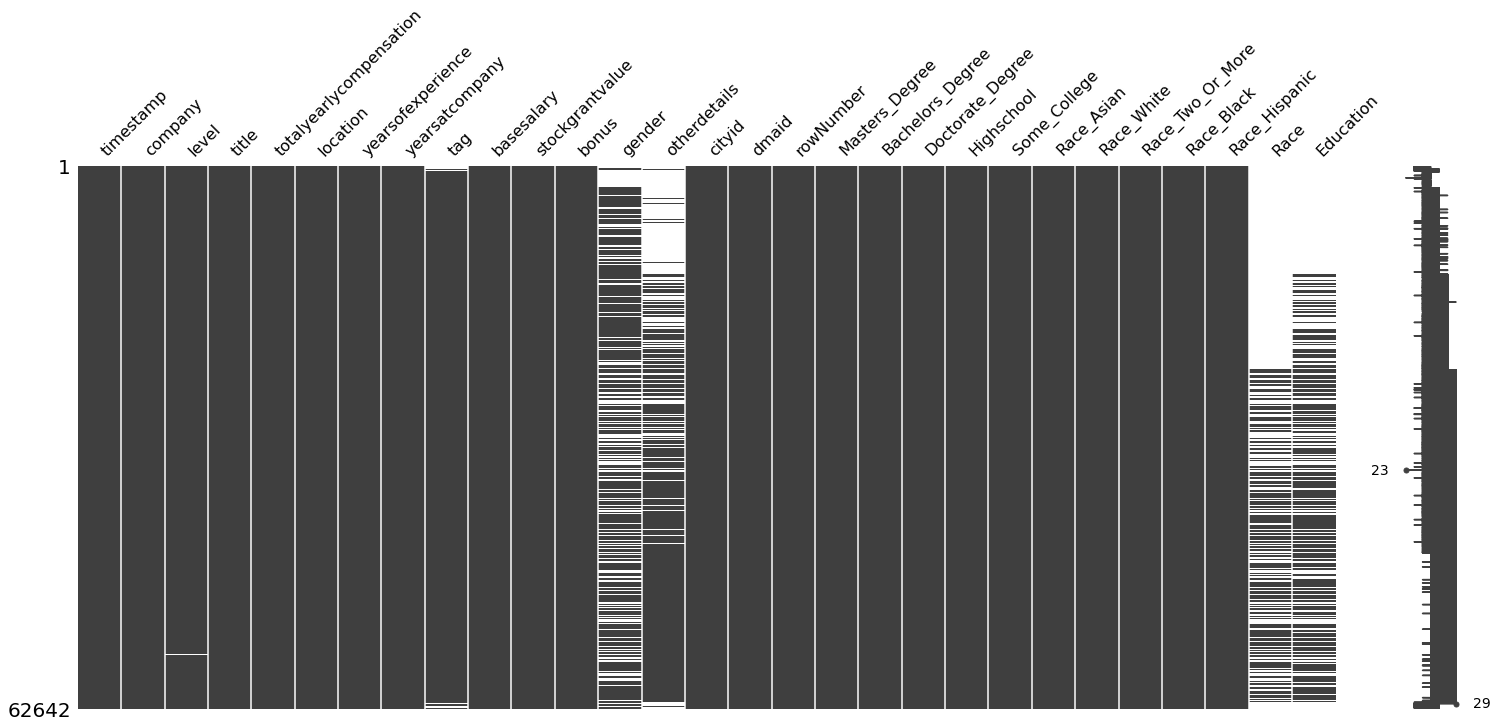

<Figure size 1080x648 with 0 Axes>

In [ ]:
#Visualize missing data
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [ ]:
#Creating new dataframe by  frame by year
df['timestamp'] = pd.to_datetime(df['timestamp'])

df2 = df[df['company'].isin(['Amazon'])]
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['year'] = pd.DatetimeIndex(df2['timestamp']).year
df3 = df2[df2['year'].isin([2018,2019,2020,2021])]

<ipython-input-8-462c1d1b6437>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = pd.to_datetime(df2['timestamp'])
<ipython-input-8-462c1d1b6437>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = pd.DatetimeIndex(df2['timestamp']).year


In [ ]:
#Selecting important key values
df4=df3[["year","company","title","totalyearlycompensation","yearsofexperience","yearsatcompany","location"]]

In [ ]:
df4.head()

,year,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,location
118,2018,Amazon,Software Engineering Manager,500000,11.0,5.00,"Sunnyvale, CA"
121,2018,Amazon,Software Engineer,144000,1.0,0.00,"Seattle, WA"
125,2018,Amazon,Product Manager,225000,6.5,3.50,"Seattle, WA"
126,2018,Amazon,Software Engineering Manager,320000,7.0,7.00,"Seattle, WA"
132,2018,Amazon,Software Engineer,145000,1.0,0.25,"Seattle, WA"


In [ ]:
#Extracting  data into CSV file
df4.to_csv('Amazon_cleandata.csv') 

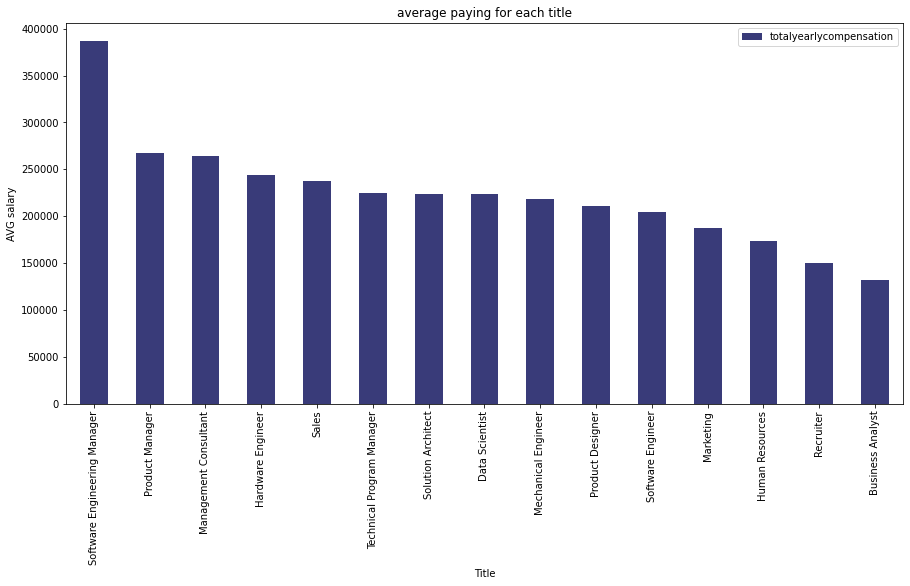

In [ ]:
#Average paying for each title
df4.groupby(['title']).agg({'totalyearlycompensation':'mean'}).sort_values(by = 'totalyearlycompensation',ascending=False).plot(kind = 'bar',
                                                                                                                               rot = 90,figsize=(15, 7),
                                                                                                                               title = 'average paying for each title',
                                                                                                                               xlabel = 'Title',
                                                                                                                               ylabel = 'AVG salary',
                                                                                                                               colormap = 'tab20b',
                                                                                                                               fontsize=10)

Text(0.5, 1.0, 'Average Annual Compensation [2018-2021]')

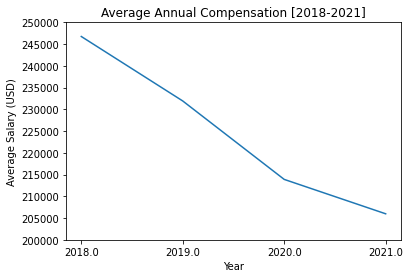

In [ ]:
#AVERAGE ANNUAL COMPENSATION PER YEAR (ALL COMPANIES)
df = df[df['year'].isin([2018,2019,2020,2021])]
per_year = df[['totalyearlycompensation','year']]

average_salary = per_year.groupby('year').totalyearlycompensation.mean()
average_salary = average_salary.to_frame()

listofyears = average_salary.index.values.astype('float')
avg_yearly_salary = average_salary['totalyearlycompensation'].to_list()

x_pos = []
for i in range(len(listofyears)): x_pos.append(i)
plt.plot(x_pos, avg_yearly_salary)

plt.xticks(x_pos, listofyears)

yt_values = []
yt_labels = []
for y in range(200000,255000,5000):
    yt_values.append(y)
    yt_labels.append(y)
    
plt.yticks(yt_values, yt_labels)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Annual Compensation [2018-2021]")

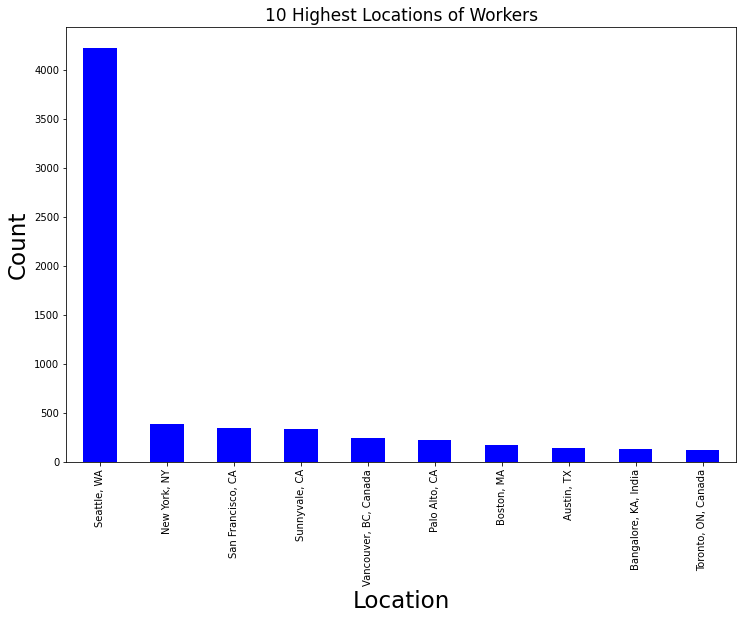

In [ ]:
#Highest Locations of workers at Amazon
plt.figure(figsize=(12,8))
df4["location"].value_counts().iloc[:10].plot(kind="bar", color="blue")
plt.title("10 Highest Locations of Workers", size=17)
plt.xlabel("Location", size=23)
plt.ylabel("Count", size=23)
plt.xticks(rotation=90)
plt.show()

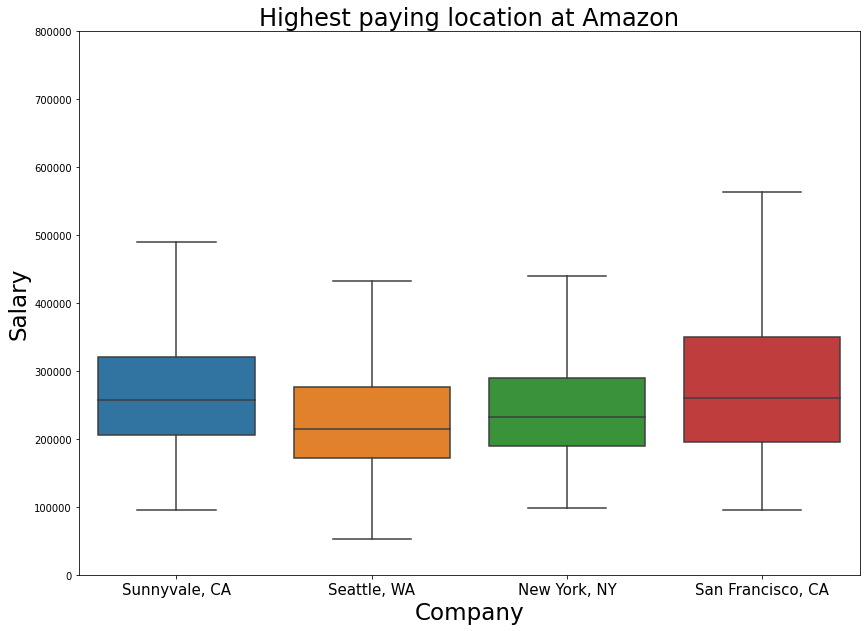

In [ ]:
# Highest paying location at Amazon
plt.figure(figsize=(14,10))

df_location = df4[(df4['location'] == 'Seattle, WA') | (df4['location'] == 'San Francisco, CA') |
                (df4['location'] == 'Sunnyvale, CA') | (df4['location'] == 'New York, NY') | (df4['location'] == 'Vancouver,BC,Canada')| (df4['location'] == 'Palo Alto,CA')| (df4['location'] == 'Boston,MA')| (df4['location'] == 'Austin,TX')| (df4['location'] == 'Bangalore,KA,India')| (df4['location'] == 'Toronto,ON,Canada')]

fig = sns.boxplot(x='location', y="totalyearlycompensation", data=df_location, showfliers = False, palette = 'tab10')
sns.color_palette("tab10")
plt.title('Highest paying location at Amazon', fontsize=24)
plt.xlabel("Company", size=23)
plt.ylabel("Salary", size=23)
plt.xticks(fontsize=15)
fig.axis(ymin=0, ymax=800000);

plt.show()


Text(0.5, 1.0, 'Average Annual Compensation (Amazon) [2018-2021]')

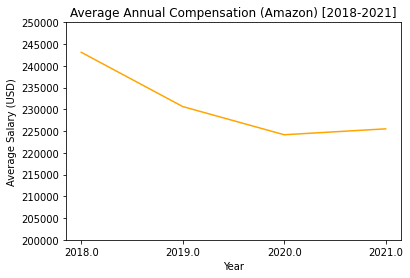

In [ ]:
#AVERAGE ANNUAL COMPENSATION PER YEAR (AMAZON)
amazon_per_year = df4[['totalyearlycompensation','year']]

amazon_average_salary = amazon_per_year.groupby('year').totalyearlycompensation.mean()
amazon_average_salary = amazon_average_salary.to_frame()

listofyears = amazon_average_salary.index.values.astype('float')
amazon_avg_yearly_salary = amazon_average_salary['totalyearlycompensation'].to_list()

x_pos = []
for i in range(len(listofyears)): x_pos.append(i)
plt.plot(x_pos, amazon_avg_yearly_salary, color='orange')

plt.xticks(x_pos, listofyears)

yt_values = []
yt_labels = []

for y in range(200000,255000,5000):
    yt_values.append(y)
    yt_labels.append(y)

plt.yticks(yt_values, yt_labels)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Annual Compensation (Amazon) [2018-2021]")

In [ ]:
df_location.shape

(5295, 7)

In [ ]:
#Jobs based on location
min_sal = 10000
max_sal = 458000 
avg_sal2 = df4[(df4["totalyearlycompensation"] >=min_sal) & (df4["totalyearlycompensation"] <= max_sal)].groupby("location").mean(
            )
avg_sal2["count"] = df4.location.value_counts()
avg_sal2 = avg_sal2.reset_index().sort_values("count",ascending = False).head(15)
avg_sal2.totalyearlycompensation = avg_sal2.totalyearlycompensation.round(2)
fig = px.bar(avg_sal2,x= "location", y = "totalyearlycompensation",
       labels = {"location" : "Locations","totalyearlycompensation" : "Average Compensation"},
       color = "count",
       text = "totalyearlycompensation",
       title = "Jobs based on Locations",color_continuous_scale = "picnic", template ="plotly_dark")
fig.update_traces (textposition = "outside",#texttemplate = "${.2f}".format(avg_sal.totalyearlycompensation.values))
                  )
fig.show()

In [ ]:
#build a dataset with only year , yearlycompensation and job title
df5= df4[['year','totalyearlycompensation','title']]
result = df5.groupby(['title','year'])['totalyearlycompensation'].aggregate('mean').reset_index()

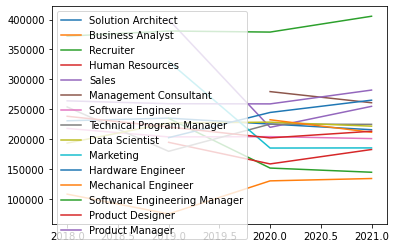

In [ ]:
#Plot the new dataframe
title_set= set(result['title'])

result=result.sort_values(by='year',ascending=False)


plt.figure()
for title in title_set:
     selected_data = result.loc[result['title'] == title]
     plt.plot(selected_data['year'], selected_data['totalyearlycompensation'], label=title)


     
plt.legend()
plt.show()


In [ ]:
select_job = result.loc[(result['title'] == 'Software Engineer')|(result['title'] == 'Hardware Engineer')|(result['title'] == 'Mechanical Engineer')]
print (select_job)

                  title  year  totalyearlycompensation
10    Hardware Engineer  2021            265342.105263
38    Software Engineer  2021            201215.734481
20  Mechanical Engineer  2021            211789.473684
37    Software Engineer  2020            204473.063973
19  Mechanical Engineer  2020            232666.666667
9     Hardware Engineer  2020            244846.153846
36    Software Engineer  2019            204032.176122
8     Hardware Engineer  2019            202800.000000
35    Software Engineer  2018            218204.096045


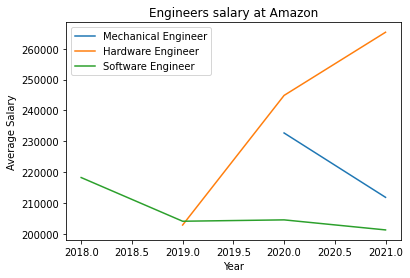

In [ ]:
#Engineers salary at Amazon
title_set= set(select_job['title'])

result=result.sort_values(by='year',ascending=False)

plt.figure()
for title in title_set:
     selected_data = result.loc[result['title'] == title]
     plt.plot(selected_data['year'], selected_data['totalyearlycompensation'], label=title)

plt.title("Engineers salary at Amazon")
plt.xlabel("Year")
plt.ylabel("Average Salary")

     
plt.legend()
plt.show()

                           title  year  totalyearlycompensation
15         Management Consultant  2021            261066.666667
42  Software Engineering Manager  2021            405452.736318
28               Product Manager  2021            282206.293706
14         Management Consultant  2020            279666.666667
27               Product Manager  2020            259146.103896
41  Software Engineering Manager  2020            379017.316017
26               Product Manager  2019            259427.807487
40  Software Engineering Manager  2019            380820.224719
39  Software Engineering Manager  2018            372250.000000
25               Product Manager  2018            264239.583333


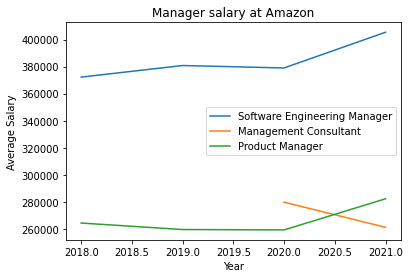

In [ ]:
#Manager salary at Amazon
select_job = result.loc[(result['title'] == 'Software Engineering Manager')|(result['title'] == 'Product Manager')|(result['title'] == 'Management Consultant')|(result['title'] == 'Marketing Manager')]
print (select_job)
title_set= set(select_job['title'])

result=result.sort_values(by='year',ascending=False)

plt.figure()
for title in title_set:
     selected_data = result.loc[result['title'] == title]
     plt.plot(selected_data['year'], selected_data['totalyearlycompensation'], label=title)

plt.title("Manager salary at Amazon")
plt.xlabel("Year")
plt.ylabel("Average Salary")
     
plt.legend()
plt.show()

In [ ]:
result1 = df4.groupby(['yearsatcompany','yearsofexperience'])['totalyearlycompensation'].aggregate('mean').reset_index()
print(result1)

     yearsatcompany  yearsofexperience  totalyearlycompensation
0               0.0                0.0            146286.945813
1               0.0                0.6            144000.000000
2               0.0                1.0            155424.568966
3               0.0                2.0            177333.333333
4               0.0                2.5            202000.000000
..              ...                ...                      ...
372            16.0               22.0            510000.000000
373            18.0               18.0            366666.666667
374            20.0               10.0            180000.000000
375            20.0               20.0            273250.000000
376            20.0               35.0            960000.000000

[377 rows x 3 columns]


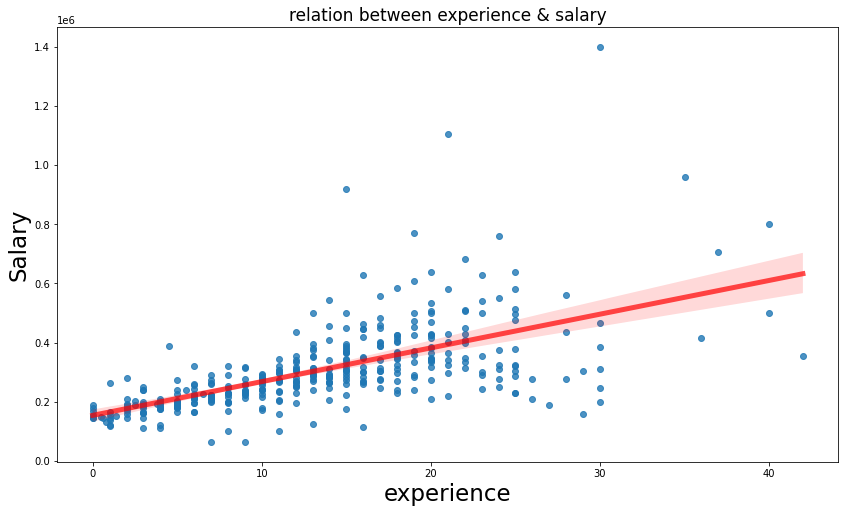

In [ ]:
#regplot to see how experience affect salary
plt.figure(figsize=(14, 8))
sns.regplot(x=result1["yearsofexperience"], y=result1["totalyearlycompensation"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("relation between experience & salary", size=17)
plt.xlabel("experience", size=23)
plt.ylabel("Salary", size=23)

plt.show()

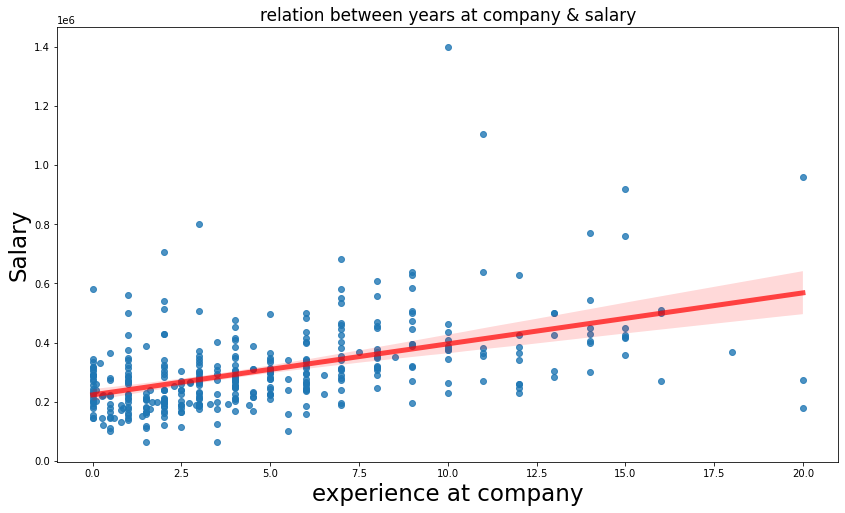

In [ ]:
#regplot to see how experience at company affect salary
plt.figure(figsize=(14, 8))
sns.regplot(x=result!["yearsatcompany"], y=result1["totalyearlycompensation"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("relation between years at company & salary", size=17)
plt.xlabel("experience at company", size=23)
plt.ylabel("Salary", size=23)
plt.show()

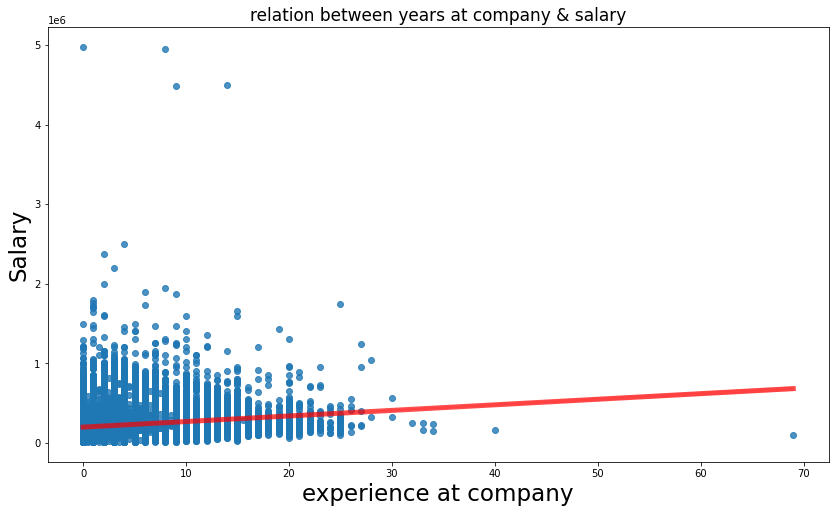

In [ ]:
plt.figure(figsize=(14, 8))
sns.regplot(x=df["yearsatcompany"], y=df["totalyearlycompensation"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("relation between years at company & salary", size=17)
plt.xlabel("experience at company", size=23)
plt.ylabel("Salary", size=23)
plt.show()

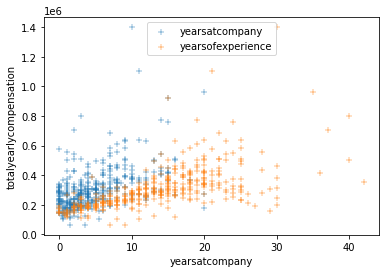

In [ ]:
sns.scatterplot(x="yearsatcompany", y="totalyearlycompensation", marker="+", data=result1,label="yearsatcompany")
sns.scatterplot(x="yearsofexperience", y="totalyearlycompensation", marker="+", data=result1,label="yearsofexperience")

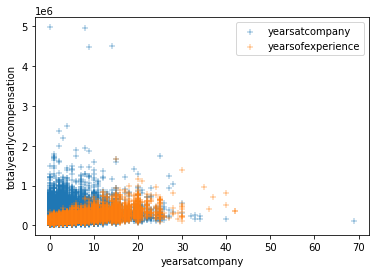

In [ ]:
sns.scatterplot(x="yearsatcompany", y="totalyearlycompensation", marker="+", data=df,label="yearsatcompany")
sns.scatterplot(x="yearsofexperience", y="totalyearlycompensation", marker="+", data=df4,label="yearsofexperience")


In [ ]:
min_sal = 10000
max_sal = 458000 
avg_sal2 = df4[(df4["totalyearlycompensation"] >=min_sal) & (df4["totalyearlycompensation"] <= max_sal)].groupby("title").mean(
            )
avg_sal2["count"] = df4.location.value_counts()
avg_sal2 = avg_sal2.reset_index().sort_values("count",ascending = False).head(15)
avg_sal2.totalyearlycompensation = avg_sal2.totalyearlycompensation.round(2)
fig = px.bar(avg_sal2,x= "title", y = "totalyearlycompensation",
       labels = {"title" : "JobTitle","totalyearlycompensation" : "Average Compensation"},
       color = "count",
       text = "totalyearlycompensation",
       title = "Jobs based on title",color_continuous_scale = "picnic", template ="plotly_dark")
fig.update_traces (textposition = "outside",#texttemplate = "${.2f}".format(avg_sal.totalyearlycompensation.values))
)
fig.update_traces(marker_color='blue')
                  
fig.show()

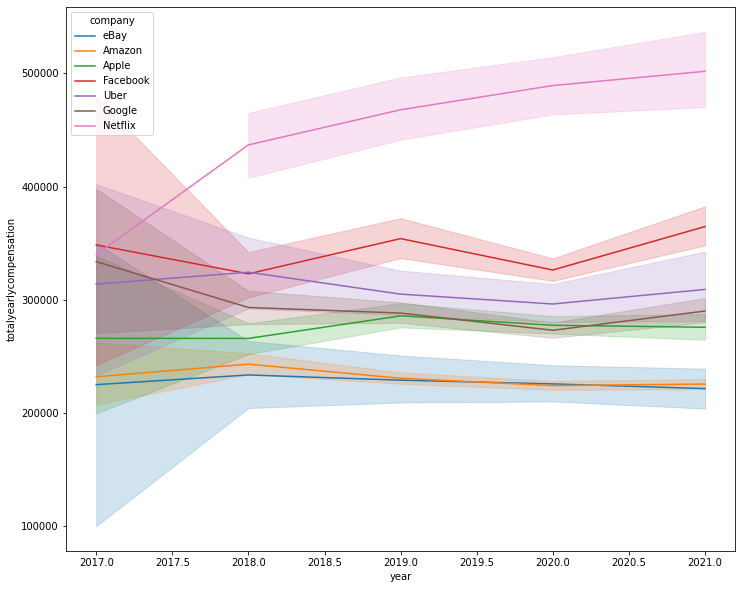

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = pd.DatetimeIndex(df['timestamp']).year
%matplotlib inline
import seaborn as sns
df6= df.loc[(df['company'] == 'Amazon')|(df['company'] == 'eBay')|(df['company'] == 'Apple')|(df['company'] == 'Facebook')|(df['company'] == 'Uber')|(df['company'] == 'Google')|(df['company'] == 'Netflix')]
plt.figure(figsize=(12,10))
sns.lineplot(x=df6.year, y=df6.totalyearlycompensation, hue=df6.company
)

In [ ]:
df4.head()

,year,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,location
118,2018,Amazon,Software Engineering Manager,500000,11.0,5.00,"Sunnyvale, CA"
121,2018,Amazon,Software Engineer,144000,1.0,0.00,"Seattle, WA"
125,2018,Amazon,Product Manager,225000,6.5,3.50,"Seattle, WA"
126,2018,Amazon,Software Engineering Manager,320000,7.0,7.00,"Seattle, WA"
132,2018,Amazon,Software Engineer,145000,1.0,0.25,"Seattle, WA"


In [ ]:
perc = df4.loc[df4["year"] == 2018, "title"]

In [ ]:
year_2018 = result[result["year"] == 2018]
year_2019 = result[result["year"] == 2019]
year_2020 = result[result["year"] == 2020]
year_2021 = result[result["year"] == 2021]

In [ ]:
year_2019.loc[len(year_2019.index)] = ['Mechanical Engineer', 2019, 1] 
year_2019.loc[len(year_2019.index)] = ['Management Consultant', 2019, 1] 


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
titles_set= set(result['title'])

In [ ]:
for titles in titles_set:
  p =year_2019.loc[year_2019["title"] == titles, "totalyearlycompensation"]
  q =year_2021.loc[year_2021["title"] == titles, "totalyearlycompensation"]
  p=int(p)
  q=int(q)
  perc=(q*100/p)-100
  print(f"The percentage increase of {titles}   is {perc} %")



The percentage increase of Solution Architect   is -8.209376925201283 %
The percentage increase of Business Analyst   is 78.26887417218543 %
The percentage increase of Recruiter   is -38.27574468085106 %
The percentage increase of Human Resources   is -6.15384615384616 %
The percentage increase of Sales   is -36.2375 %
The percentage increase of Management Consultant   is 26106500.0 %
The percentage increase of Software Engineer   is -1.3806657779171871 %
The percentage increase of Technical Program Manager   is 25.01166666666667 %
The percentage increase of Data Scientist   is -2.294216040144377 %
The percentage increase of Marketing   is -43.735757575757575 %
The percentage increase of Hardware Engineer   is 30.839250493096642 %
The percentage increase of Mechanical Engineer   is 21178800.0 %
The percentage increase of Software Engineering Manager   is 6.468147681319252 %
The percentage increase of Product Designer   is -3.2206586391991863 %
The percentage increase of Product Manager

Text(0.5, 1.0, 'Average Annual Compensation [2018-2021]')

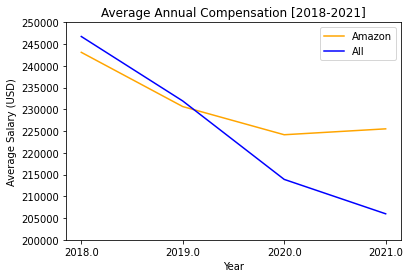

In [ ]:
#AVERAGE ANNUAL COMPENSATION PER YEAR (AMAZON VS. ALL)
x_pos = []
for i in range(len(listofyears)): x_pos.append(i)
plt.plot(x_pos, amazon_avg_yearly_salary, color='orange', label = 'Amazon')
plt.plot(x_pos, avg_yearly_salary, color='blue', label='All')

plt.xticks(x_pos, listofyears)

yt_values = []
yt_labels = []

for y in range(200000,255000,5000):
    yt_values.append(y)
    yt_labels.append(y)

plt.legend()
plt.yticks(yt_values, yt_labels)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Annual Compensation [2018-2021]")

Text(0.5, 1.0, 'Amount of Employees per Year [2018-2021]')

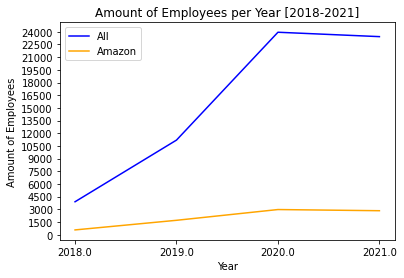

In [ ]:
#COUNT OF EMPLOYEES PER YEAR (AMAZON VS. ALL)
count_amazon= df4[['totalyearlycompensation','year']]
count_amazon = count_amazon.groupby('year').totalyearlycompensation.count()

count_clean = df[['totalyearlycompensation','year']]
count_clean = count_clean.groupby('year').totalyearlycompensation.count()

x_pos = []
for i in range(len(listofyears)): x_pos.append(i)
plt.plot(x_pos, count_clean, color='blue', label='All')
plt.plot(x_pos, count_amazon, color='orange', label = 'Amazon')


plt.xticks(x_pos, listofyears)

yt_values = []
yt_labels = []

for y in range(0,24500,1500):
    yt_values.append(y)
    yt_labels.append(y)

plt.legend()
plt.yticks(yt_values, yt_labels)
plt.xlabel("Year")
plt.ylabel("Amount of Employees")
plt.title("Amount of Employees per Year [2018-2021]")